In [1]:
import pandas as pd

In [2]:
cleaned_thousands_df = pd.read_excel(
    "../1_datasets/cleaned_data/IRENA_OFGStats_thousands.cleaned.xlsx",
    sheet_name="Cleaned_data",
)
df_thousands = cleaned_thousands_df.copy()


In [3]:
print("Thousands Dataset Info:")
print(df_thousands.info())
print("\nThousands Dataset Head:")
print(df_thousands.head())
print("\nThousands Dataset Columns:")
print(df_thousands.columns.tolist())
print("\nDuplicate columns in Thousands dataset:")
print(df_thousands.columns[df_thousands.columns.duplicated()].tolist())

Thousands Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13224 entries, 0 to 13223
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            13224 non-null  object 
 1   Country           13224 non-null  object 
 2   ISO Code          13224 non-null  object 
 3   Flow              13224 non-null  object 
 4   Group Technology  13224 non-null  object 
 5   Sub-Technology    13224 non-null  object 
 6   Technology        13224 non-null  object 
 7   Value             13224 non-null  float64
 8   Unit              13224 non-null  object 
 9   Year              13224 non-null  int64  
 10  Conflict Status   13224 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.1+ MB
None

Thousands Dataset Head:
   Region                                 Country ISO Code  \
0  Africa                                Cameroon      CMR   
1  Africa                               

In [4]:
print(df_thousands["Conflict Status"].value_counts())


Conflict Status
No Conflict    11256
Conflict        1968
Name: count, dtype: int64


In [5]:
print(df_thousands["Sub-Technology"].unique())


['Hydropower' 'Solar lights' 'Solar mini-grids' 'Solar home systems'
 'Solar cookers']


In [11]:
print(df_thousands["Technology"].unique())

['Number of people connected to hydropower'
 'Number of people using solar lights (<11 W)'
 'Number of people connected to solar mini-grids (Tier 1)'
 'Number of people connected to solar mini-grids (Tier 2+)'
 'Number of people using SHS (11-50 W)'
 'Number of people using SHS (>50 W)'
 'Number of people served by solar cookers']


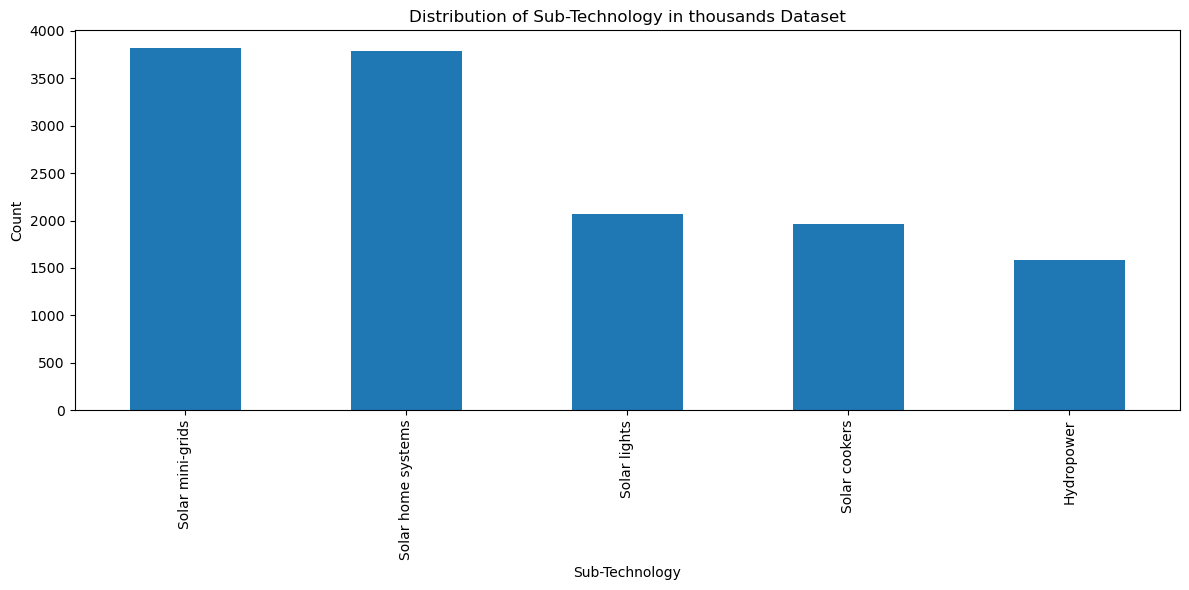

In [6]:
import matplotlib.pyplot as plt

subtech_counts = df_thousands["Sub-Technology"].value_counts()
plt.figure(figsize=(12, 6))
subtech_counts.plot(kind="bar")
plt.title("Distribution of Sub-Technology in thousands Dataset")
plt.xlabel("Sub-Technology")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

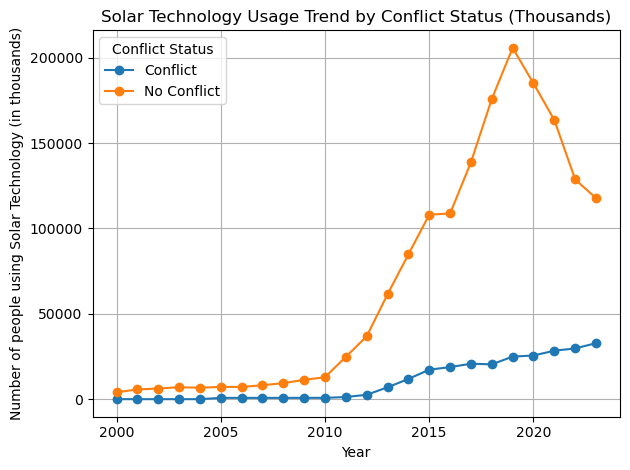

In [7]:
# Group the data by Year and Conflict Status, calculating the sum of Values
solar_trend_mw = (
    df_thousands[df_thousands["Group Technology"] == "Solar energy"]
    .groupby(["Year", "Conflict Status"])["Value"]
    .sum()
    .unstack()
)

# Create the plot
plt.figure(figsize=(12, 6))
solar_trend_mw.plot(marker="o")

plt.title("Solar Technology Usage Trend by Conflict Status (Thousands)")
plt.xlabel("Year")
plt.ylabel("Number of people using Solar Technology (in thousands)")
plt.legend(title="Conflict Status")
plt.grid(True)
plt.tight_layout()
plt.show()


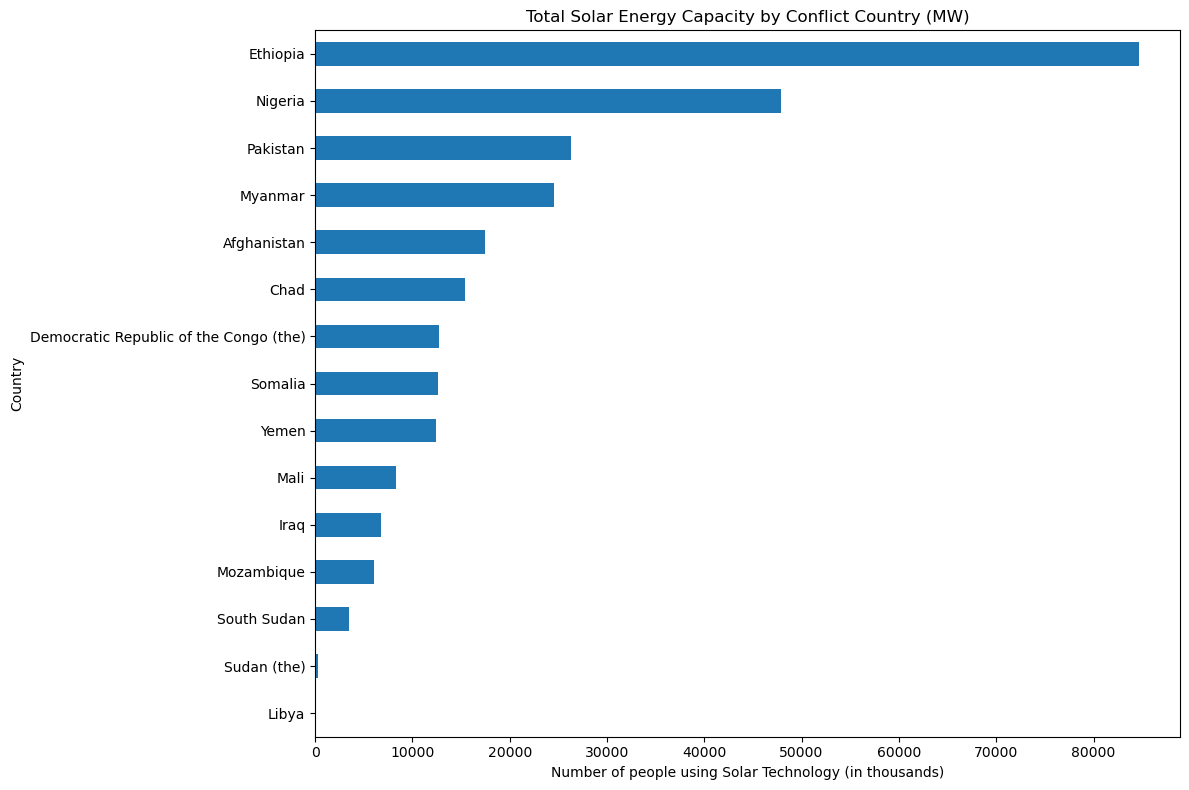

In [9]:
# Group by country and sum the values for conflict countries
conflict_by_country = (
    df_thousands[df_thousands["Conflict Status"] == "Conflict"].groupby("Country")["Value"].sum()
)
conflict_by_country = conflict_by_country.sort_values(ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
conflict_by_country.plot(kind="barh")
plt.title("Total Solar Energy Capacity by Conflict Country (MW)")
plt.xlabel("Number of people using Solar Technology (in thousands)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


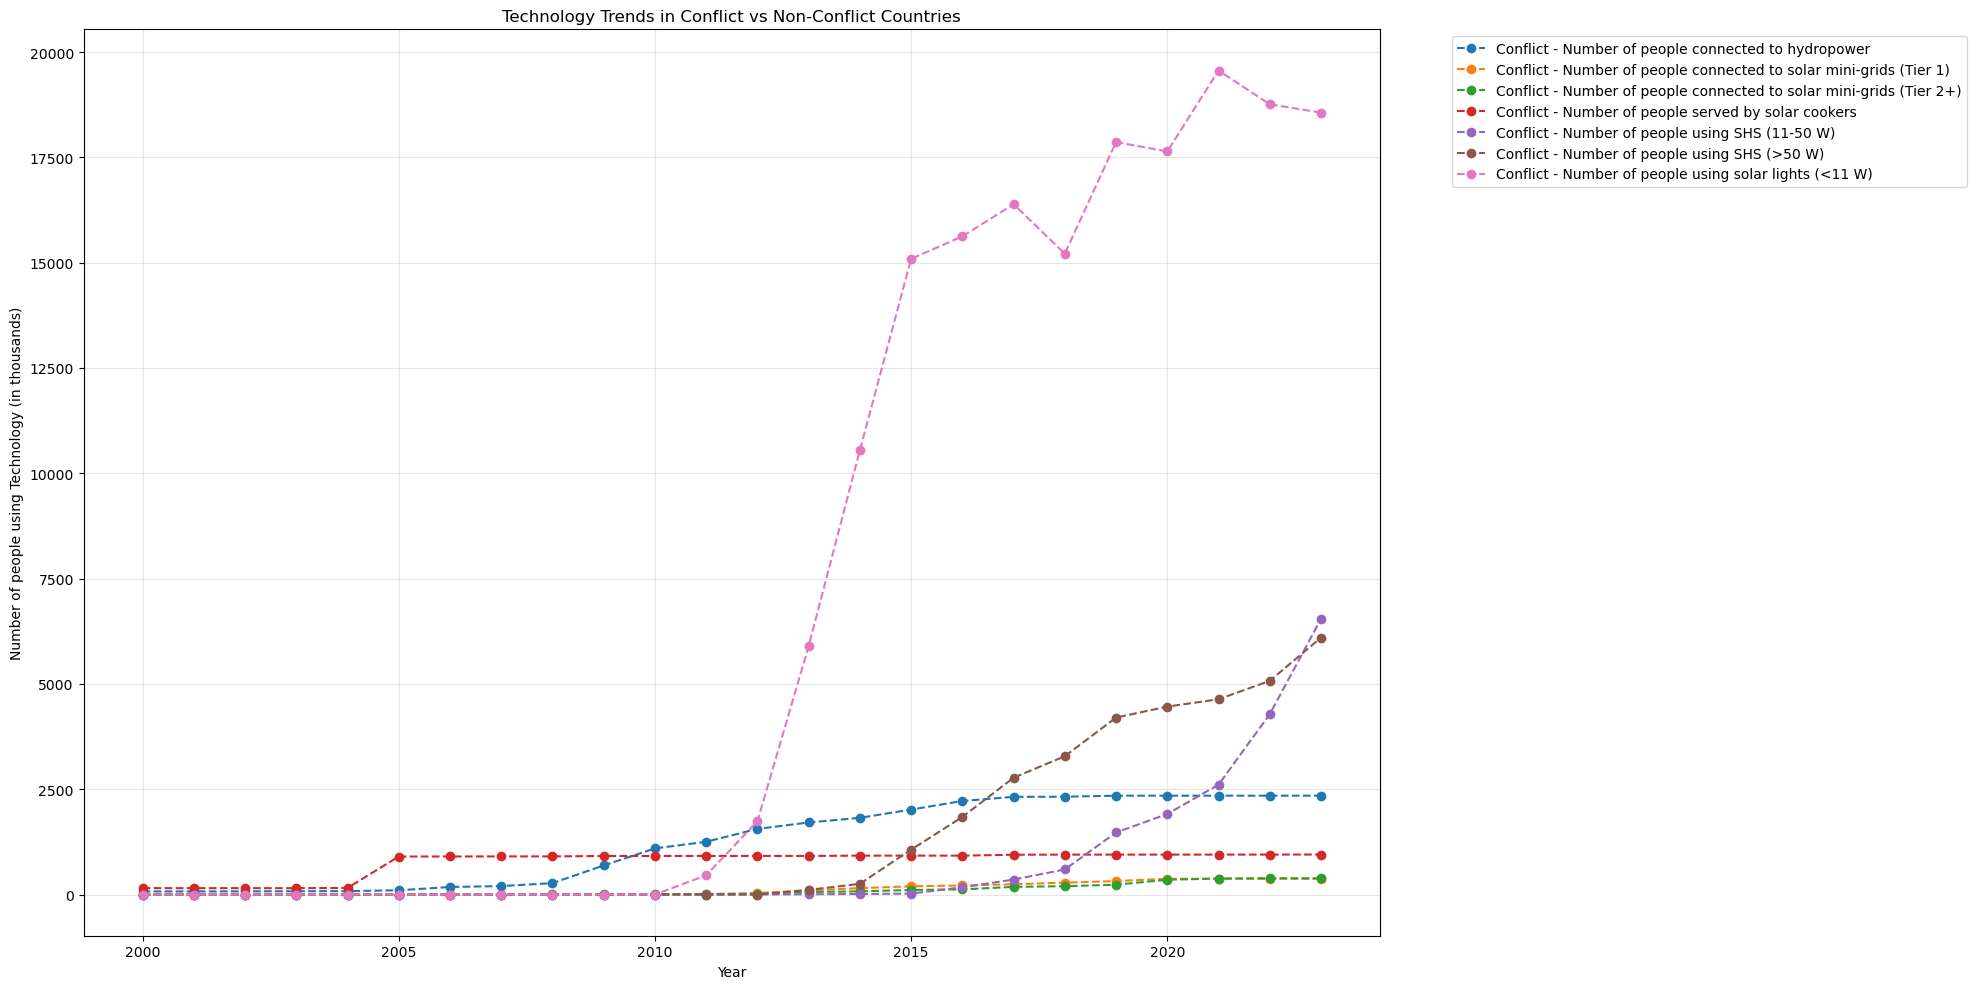

In [13]:
# Create pivot table for technology distribution by conflict status
tech_conflict_trend = (
    df_thousands.groupby(["Year", "Conflict Status", "Technology"])["Value"]
    .sum()
    .reset_index()
)

# Create the plot
plt.figure(figsize=(20, 10))

# Plot for Conflict countries
conflict_data = tech_conflict_trend[
    tech_conflict_trend["Conflict Status"] == "Conflict"
]
for tech in conflict_data["Technology"].unique():
    tech_data = conflict_data[conflict_data["Technology"] == tech]
    plt.plot(
        tech_data["Year"],
        tech_data["Value"],
        linestyle="--",
        marker="o",
        label=f"Conflict - {tech}",
    )

plt.title("Technology Trends in Conflict vs Non-Conflict Countries")
plt.xlabel("Year")
plt.ylabel("Number of people using Technology (in thousands)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


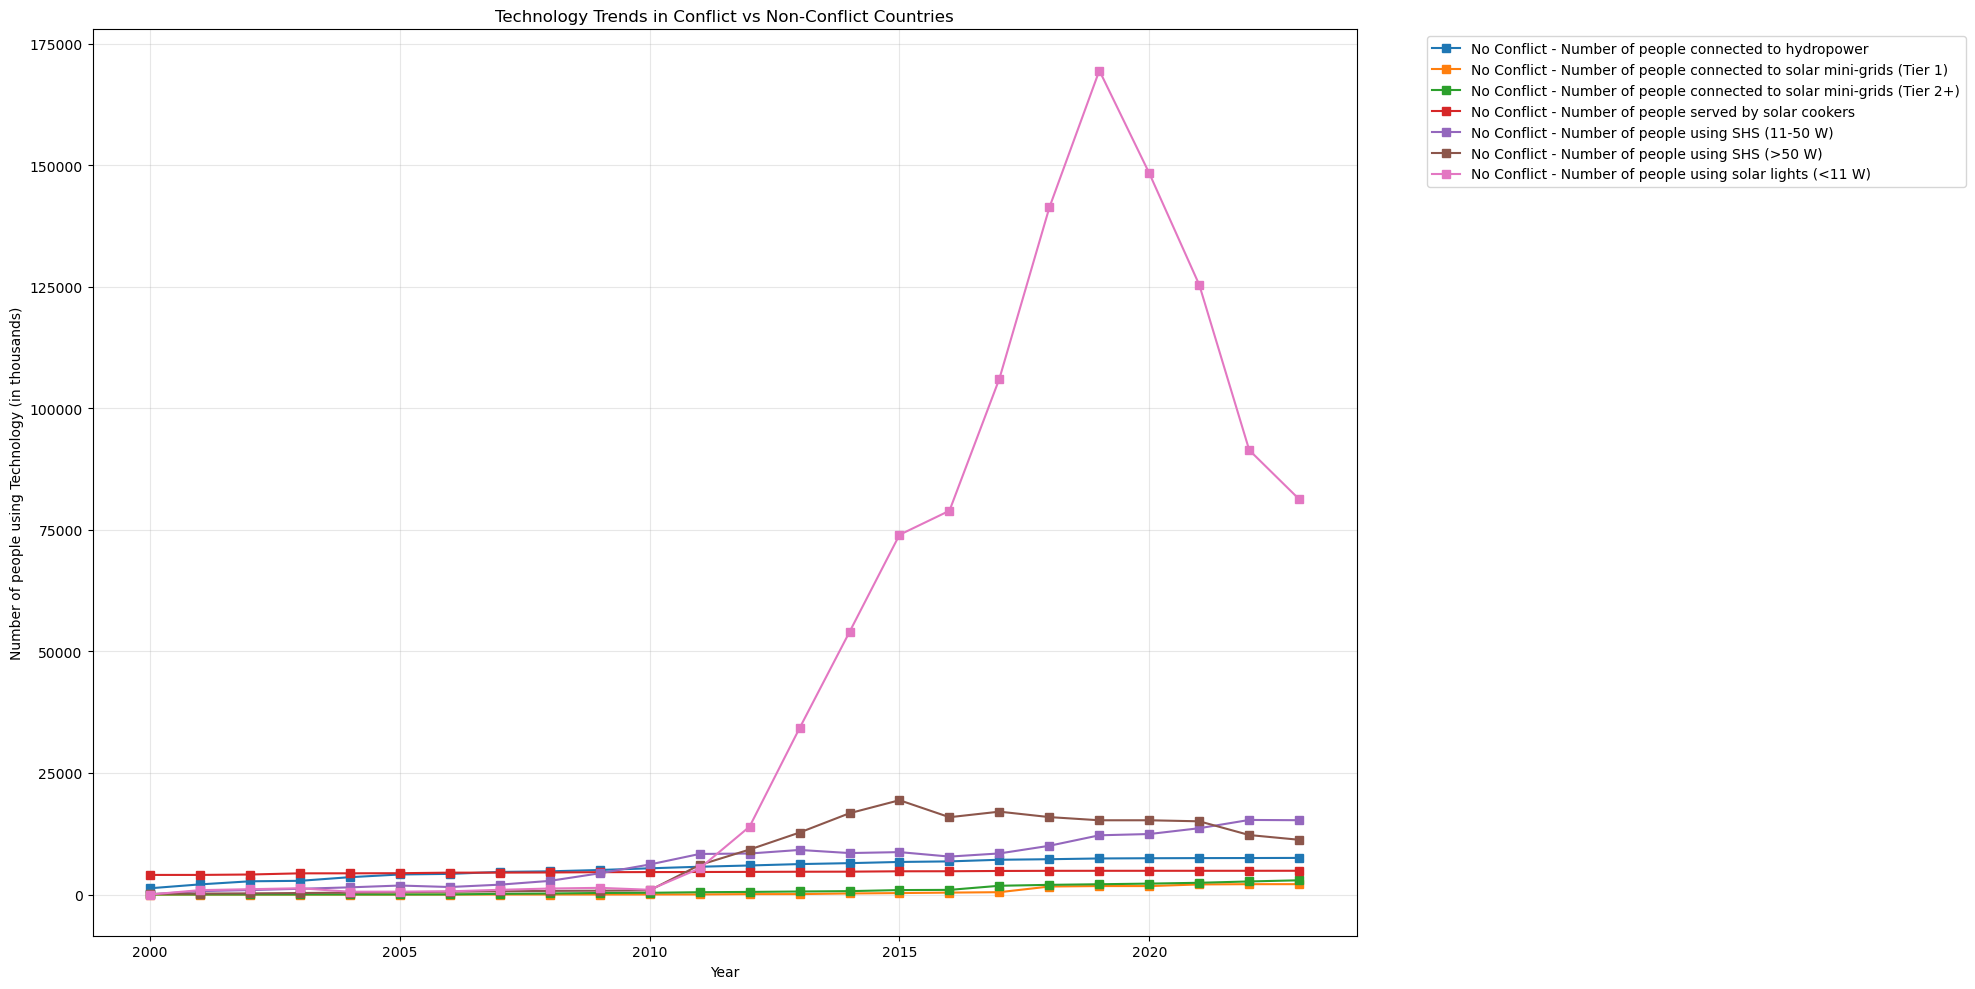

In [14]:
plt.figure(figsize=(20, 10))
no_conflict_data = tech_conflict_trend[
    tech_conflict_trend["Conflict Status"] == "No Conflict"
]
for tech in no_conflict_data["Technology"].unique():
    tech_data = no_conflict_data[no_conflict_data["Technology"] == tech]
    plt.plot(
        tech_data["Year"],
        tech_data["Value"],
        linestyle="-",
        marker="s",
        label=f"No Conflict - {tech}",
    )

plt.title("Technology Trends in Conflict vs Non-Conflict Countries")
plt.xlabel("Year")
plt.ylabel("Number of people using Technology (in thousands)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


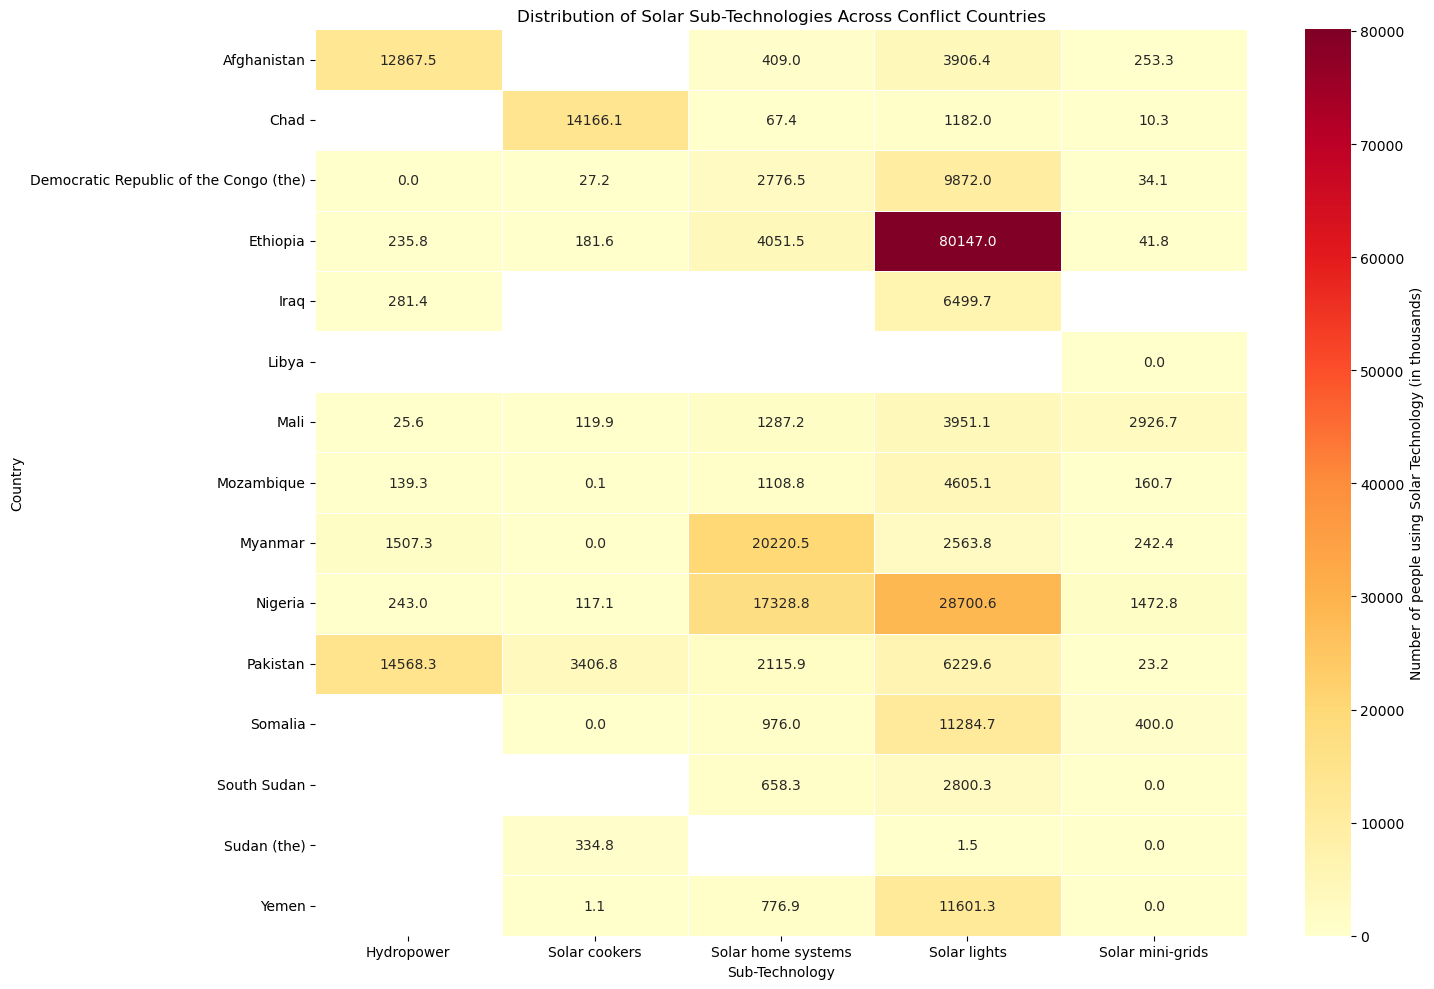

In [10]:
import seaborn as sns

# Create a pivot table for the heatmap
heatmap_data = pd.pivot_table(
    df_thousands[df_thousands["Conflict Status"] == "Conflict"],
    values="Value",
    index="Country",
    columns="Sub-Technology",
    aggfunc="sum",
)

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    annot=True,
    fmt=".1f",
    cbar_kws={"label": "Number of people using Solar Technology (in thousands)"},
    linewidths=0.5,
)

plt.title("Distribution of Solar Sub-Technologies Across Conflict Countries")
plt.xlabel("Sub-Technology")
plt.ylabel("Country")

plt.tight_layout()
plt.show()
